In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric import datasets, nn, utils

In [2]:
dataset = datasets.MoleculeNet(root='/tmp/MoleculeNet', name='FreeSolv')

mol2 = dataset.from_smiles("Cc1ccccc1")
mol1 = dataset.from_smiles("Cc1c(cc(cc1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[O-]")

In [3]:
ATOMIC_NUMBER = {
    1: "H",
    3: "Li",
    4: "Be",
    5: "B",
    6: "C",
    7: "N",
    8: "O",
    9: "F",
    11: "Na",
    12: "Mg",
    13: "Al",
    14: "Si",
    15: "P",
    16: "S",
    17: "Cl",
    19: "K",
    20: "Ca",
}


def plot_graph(data, seed=None):
    g = utils.to_networkx(data, to_undirected=True)
    layout = nx.spring_layout(g, seed=seed)
    
    mol_labels = {
        i: ATOMIC_NUMBER[int(z)]
        for (i, z) in enumerate(data.x[:,0])
    }
    
    nx.draw_networkx_nodes(g, pos=layout, node_color="#CCCCCC")
    nx.draw_networkx_edges(g, pos=layout, width=2, edge_color="#666666")
    nx.draw_networkx_labels(g, pos=layout, labels=mol_labels)
    # plt.title(data.smiles)
    plt.plot()

    return (g, mol_labels)

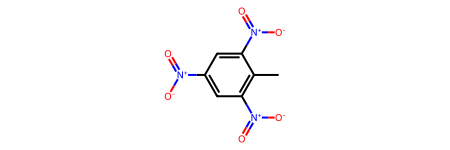

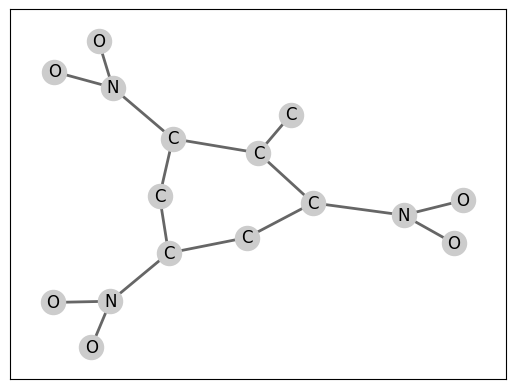

In [4]:
(g1, mol_labels1) = plot_graph(mol1, seed=3)
utils.to_rdmol(mol1)

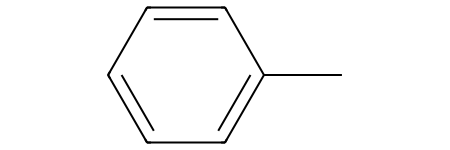

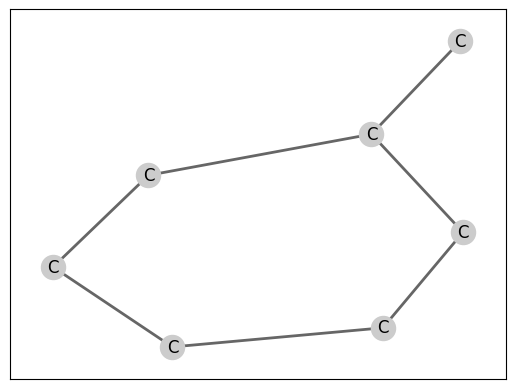

In [5]:
(g2, mol_labels2) = plot_graph(mol2, seed=3)
utils.to_rdmol(mol2)

In [6]:
g = g2
mol = mol2

wl = nn.conv.WLConv()
x = mol.x[:,0]
x

tensor([6, 6, 6, 6, 6, 6, 6])

In [7]:
colors = wl.forward(x, edge_index=mol.edge_index)
colors

tensor([0, 1, 2, 2, 2, 2, 2])

In [8]:
wl.histogram(colors)

tensor([[1, 1, 5]])

In [9]:
wl2 = nn.Sequential('x, edge_index', [
    (nn.conv.WLConv(), 'x, edge_index -> x'),
    (nn.conv.WLConv(), 'x, edge_index -> x'),
    # (nn.conv.WLConv(), 'x, edge_index -> x'),
])

colors = wl2.forward(x, edge_index=mol.edge_index)
colors

tensor([0, 1, 2, 3, 3, 3, 2])

In [10]:
wl2[-1].histogram(colors)

tensor([[1, 1, 2, 3]])

[]

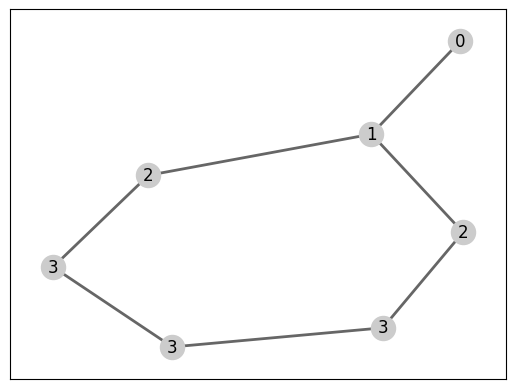

In [11]:
layout = nx.spring_layout(g, seed=3)
nx.draw_networkx_nodes(g, pos=layout, node_color="#CCCCCC")
nx.draw_networkx_edges(g, pos=layout, width=2, edge_color="#666666")
nx.draw_networkx_labels(g, pos=layout, labels=dict(enumerate(colors.tolist())))
plt.plot()